cropped_yale_CNN

## <center>Face Recognition<center>

### <center> CNN<center> 

In [12]:
#coding=utf-8
import scipy.io as sio
import numpy as np
import pickle
import os
from sklearn.cross_validation import train_test_split
import seaborn
import matplotlib.pyplot as plt
 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import SGD
import keras.optimizers as optimizers
from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [48]:
# 38 classes (1-39, 0&14 are empty)
nb_classes = 40 
nb_epoch = 20 
batch_size = 40 
 
lr=0.001 #learning rate
decay=1e-6 
momentum=0.9 # momentum

In [14]:
# input image dimensions
img_rows, img_cols = 192, 168 #img shape

# number of convolutional filters to use
nb_filters1, nb_filters2 = 5, 10 

# size of pooling area for max pooling
nb_pool = 2 #pooling size

# convolution kernel size
nb_conv = 3 

#### <center> train model <center> 

In [49]:
model = Sequential()  
    
# Convolution
model.add(Conv2D(nb_filters1, (nb_conv, nb_conv),
                 padding='valid',
                 kernel_initializer='glorot_normal',
                 input_shape=(img_rows, img_cols,1 ),name='Conv2D_1'))
model.add(Activation('relu'))

# Plooling
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

# Convolution
model.add(Conv2D(nb_filters2, (nb_conv, nb_conv)))
model.add(Activation('relu'))

# Plooling
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

# Flatten
model.add(Flatten())

# Fully connection
model.add(Dense(1000))  # unit between[#input, #output], [38,32259]
model.add(Activation('relu'))
    
# initialize output layer
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [50]:
# compile
sgd = optimizers.SGD(lr=lr, decay=decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [39]:
x0 = x[0].reshape((x[0].shape[0], x[0].shape[1], 1))
print(x[0].shape)
print(x0.shape)


(192, 168, 1)
(192, 168, 1)


In [40]:
Y = y.astype(np.int)
Y_train = y_train.astype(np.int)
Y_test = y_test.astype(np.int)
np.unique(Y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])

In [41]:
YY_train = np_utils.to_categorical(Y_train, 40)
YY_test  = np_utils.to_categorical(Y_test , 40)

In [187]:
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

#### <center> fit model <center> 

In [51]:
t0 = time()
history = model.fit(x_train, YY_train, batch_size = batch_size, epochs = nb_epoch,verbose=2,
                  validation_data = (x_test, YY_test), shuffle = True)
print(time() - t0,"s")

Train on 2169 samples, validate on 241 samples
Epoch 1/20
 - 25s - loss: 3.5532 - acc: 0.1245 - val_loss: 3.2501 - val_acc: 0.3112
Epoch 2/20
 - 24s - loss: 2.1410 - acc: 0.4938 - val_loss: 1.8681 - val_acc: 0.4730
Epoch 3/20
 - 23s - loss: 0.8033 - acc: 0.7953 - val_loss: 2.1818 - val_acc: 0.5892
Epoch 4/20
 - 24s - loss: 0.4346 - acc: 0.9036 - val_loss: 0.3477 - val_acc: 0.9253
Epoch 5/20
 - 26s - loss: 0.1243 - acc: 0.9733 - val_loss: 0.7114 - val_acc: 0.8174
Epoch 6/20
 - 27s - loss: 0.0776 - acc: 0.9802 - val_loss: 0.1716 - val_acc: 0.9751
Epoch 7/20
 - 25s - loss: 0.0176 - acc: 0.9991 - val_loss: 0.0709 - val_acc: 0.9959
Epoch 8/20
 - 25s - loss: 0.0065 - acc: 0.9995 - val_loss: 0.0707 - val_acc: 0.9917
Epoch 9/20
 - 28s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9876
Epoch 10/20
 - 25s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0574 - val_acc: 0.9917
Epoch 11/20
 - 26s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0547 - val_acc: 0.9917
Epoch 12/20
 - 25s - loss: 

In [211]:
model.predict_classes(x[0::100], verbose=1)


25/25 [==============================] - 0s 7ms/step


array([33, 34,  5,  4, 35, 32, 17, 21, 26, 27, 18, 16, 29,  8, 30, 39,  1,
       38, 31,  9, 13, 22, 23, 12, 15])

In [213]:
y[0::100]

array(['33', '34', '05', '04', '35', '32', '17', '21', '26', '27', '18',
       '16', '29', '08', '30', '39', '01', '38', '31', '09', '13', '22',
       '23', '12', '15'], dtype='<U2')

#### <center> print history <center> 

In [74]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [52]:
# display loss change

def displayHistory(history,mode=1):
    print(history.history.keys())
    write_his= open('history', 'wb')
    
    sns.set_style('whitegrid')
    plt.rcParams['figure.figsize'] = [14,11]

    if mode>0:
        plt.plot(history.history['acc'],color='navy')
        plt.plot(history.history['loss'],color='green')
        plt.xlabel('epoch')
        plt.legend(['acc', 'loss'], loc='upper left',fontsize='x-large')
        
    # summarize history for acc
    if mode>1:
        plt.plot(history.history['val_acc'],color='darkorange',)
        plt.plot(history.history['val_loss'],color='red')
        plt.legend(['acc', 'loss','val-acc', 'val-loss'], loc='upper left',fontsize='x-large')
 
    plt.title('Loss vs. Epoch')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    write_his.close()

In [87]:
hist_hist = pd.DataFrame({'train_accu':history.history['acc'],'val_accu':history.history['val_acc'],
                          'train_loss':history.history['loss'],'val_loss':history.history['val_loss']}).T
hist_hist.columns = range(1,21)
hist_hist.T

,train_accu,val_accu,train_loss,val_loss
1,0.124481,0.311203,3.553174,3.250124
2,0.493776,0.473029,2.141047,1.868085
3,0.795297,0.589212,0.803350,2.181779
4,0.903642,0.925311,0.434612,0.347696
5,0.973260,0.817427,0.124274,0.711427
6,0.980175,0.975104,0.077612,0.171563
7,0.999078,0.995851,0.017579,0.070891
8,0.999539,0.991701,0.006519,0.070748
9,1.000000,0.987552,0.003279,0.063718
10,1.000000,0.991701,0.002548,0.057416


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


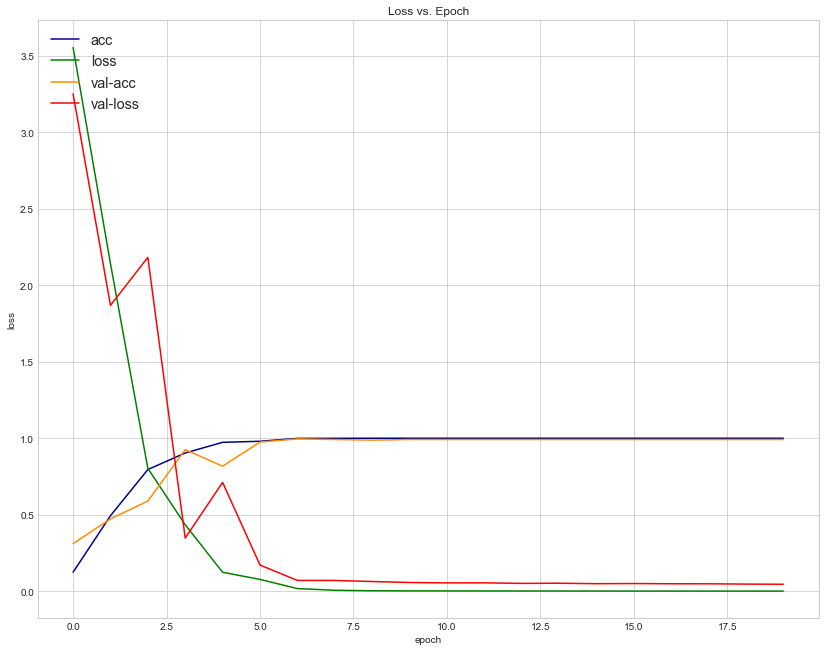

In [53]:
displayHistory(history, mode=2)

#### <center> predict test data <center> 

In [54]:
test_result = model.predict_classes(x_test, verbose=1)

241/241 [==============================] - 1s 5ms/step


#### <center> print test result <center> 

In [72]:
test_accuracy = np.mean(np.equal(Y_test, test_result))  

In [73]:
print("accuracy:", test_accuracy)

accuracy: 0.991701244813278


#### <center> print history <center> 

In [ ]:
if os.path.exists('bestacc.pkl'):# save histoty
    read_file = open('bestacc.pkl', 'rb')
    bestacc = pickle.load(read_file)
    read_file.close()
    if(bestacc<test_accuracy):
        write_file = open('bestacc.pkl', 'wb')
        pickle.dump(test_accuracy, write_file, -1)
        model.save_weights('model2_weights.h5', overwrite=True)
        write_file.close()
else:
    write_file = open('bestacc.pkl', 'wb')
    pickle.dump(test_accuracy, write_file, -1)
    model.save_weights('model2_weights.h5', overwrite=True)
    write_file.close()
 
best=getBesthistoryacc()
print("best accuracy:",best)